<a href="https://colab.research.google.com/github/Soumyabrata-Mahapatra/Decision-Tree/blob/main/TSFTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name- Soumyabrata Mahapatra**

# **#3 of Task 2 - Prediction using Decision Tree Algorithm**

# **In this task, we shall create** **the Decision Tree Classifier and visualize it** **graphically** 

* **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* **Uploading the dataset and reading it in the form of a dataframe**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [3]:
Iris=pd.read_csv('Iris.csv')
Iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
Iris.columns=['Id','Sepal Length(Cm)','Sepal Width(Cm)','Petal Length(Cm)','Petal Width(Cm)','Species']
Iris

,Id,Sepal Length(Cm),Sepal Width(Cm),Petal Length(Cm),Petal Width(Cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


* **Checking the existence of null values & duplicate records**

In [5]:
pd.isnull(Iris).sum()

Id                  0
Sepal Length(Cm)    0
Sepal Width(Cm)     0
Petal Length(Cm)    0
Petal Width(Cm)     0
Species             0
dtype: int64

In [6]:
duplicate=Iris.duplicated()
duplicate.sum()

0

**Hence there does not exist any null value or any duplicate record in our dataset.**

In [7]:
#Getting detailed information about the dataset

Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                150 non-null    int64  
 1   Sepal Length(Cm)  150 non-null    float64
 2   Sepal Width(Cm)   150 non-null    float64
 3   Petal Length(Cm)  150 non-null    float64
 4   Petal Width(Cm)   150 non-null    float64
 5   Species           150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Getting statistical information about the dataset

Iris.describe()

,Id,Sepal Length(Cm),Sepal Width(Cm),Petal Length(Cm),Petal Width(Cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


* **Checking the unique records inside the 'Species' column and counting the number of each of them**

In [9]:
Iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
Iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# **Data Visualization**

In [11]:
#Interactive scatterplot based on the properties of sepal

px.scatter(Iris,'Sepal Length(Cm)','Sepal Width(Cm)',color='Species')

In [12]:
#Interactive scatterplot based on the properties of petal


px.scatter(Iris,'Petal Length(Cm)','Petal Width(Cm)',color='Species')

In [62]:
#Interactive pie chart using plotly showing the distribution based on the species

px.pie(Iris,'Species')

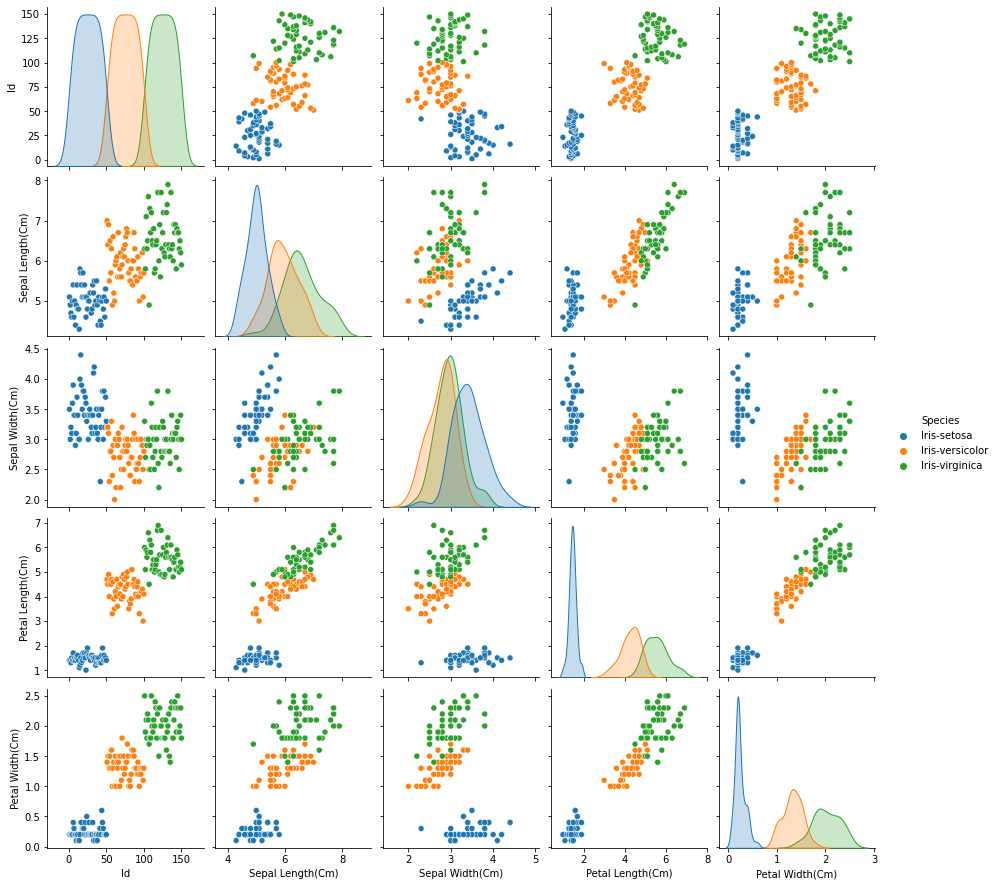

In [20]:
#Pairplot using seaborn

sns.pairplot(Iris,hue='Species')

**Now we break the dataframe into two parts , namely X and y.**

In [23]:
X=Iris[['Sepal Length(Cm)','Sepal Width(Cm)','Petal Length(Cm)','Petal Width(Cm)']]
X

,Sepal Length(Cm),Sepal Width(Cm),Petal Length(Cm),Petal Width(Cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y=Iris[['Species']]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# **Splitting the data into training & testing dataset**

In [50]:
#We take 25% data for the purpose of testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# **Preparing the data for Decision Tree Algorithm**

In [46]:
#Importing the algorithm, creating instance and fitting the training dataset for the purpose of applying Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Training is done")

Training is done


# **Representation of Decision Tree**

In [55]:
#Textual representation

from sklearn import tree
text=tree.export_text(dtree)
print(text)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.70
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.70
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.95
|   |   |--- class: Iris-virginica



Text(0.5, 1.0, 'Tree Plot')

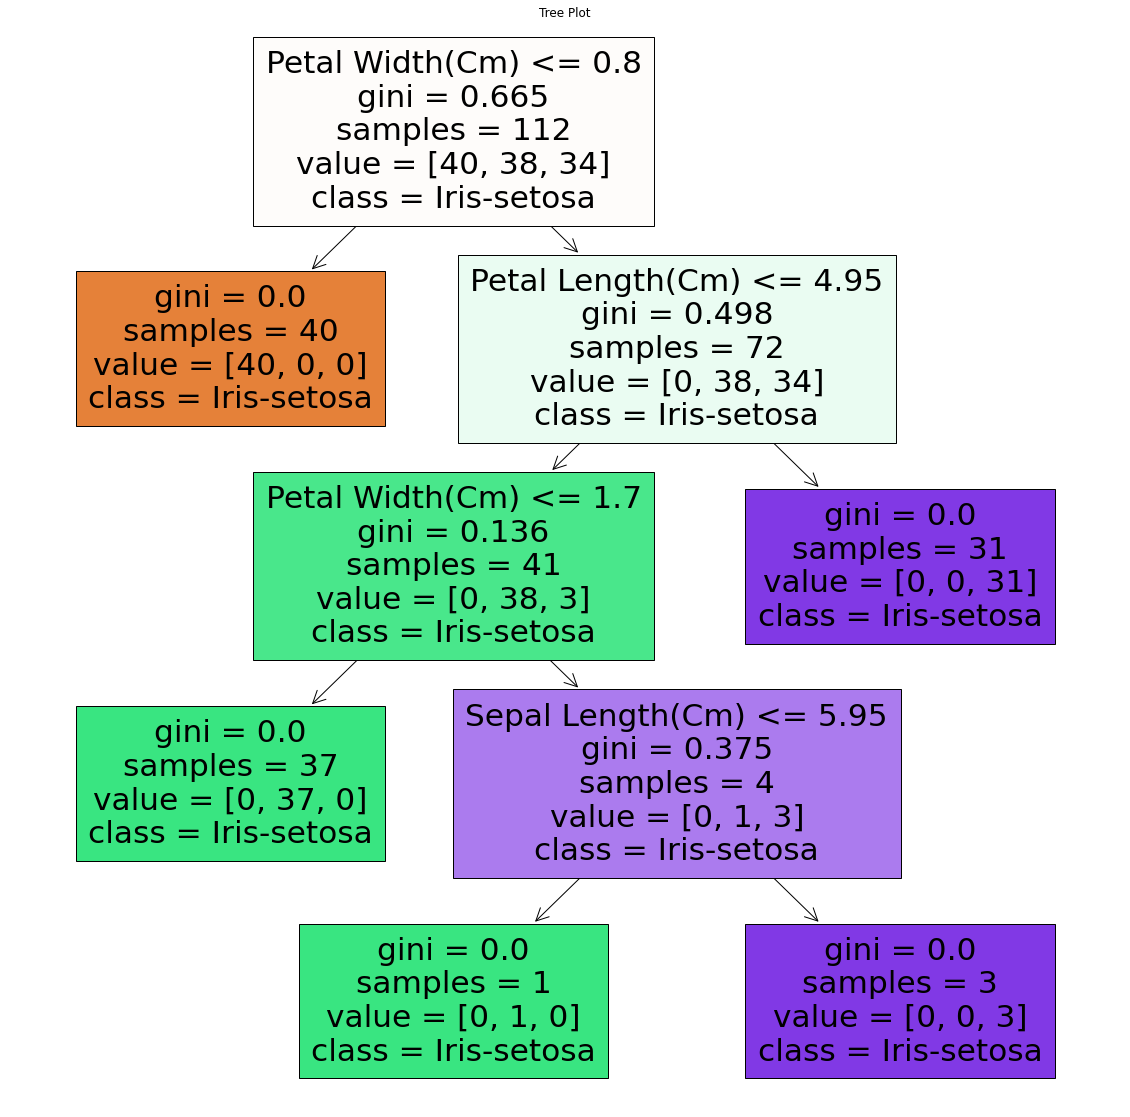

In [60]:
#Graphical representation of Tree

plt.figure(figsize=(20,20))
tree.plot_tree(dtree,feature_names=['Sepal Length(Cm)','Sepal Width(Cm)','Petal Length(Cm)','Petal Width(Cm)'],class_names=Iris['Species'],filled=True)
plt.title('Tree Plot')

# **Evaluation of our model**

In [51]:
accuracy=dtree.score(X_test,y_test)
print("Accuracy of our model is",accuracy*100,"%")

Accuracy of our model is 97.36842105263158 %


# **Thus we have successfully created the Decision Tree Classifier for the given 'Iris' dataset.**